In [25]:
m = np.array([[1,2,1,1], [1,2,1,2], [1,2,0,0]])
print(m)
print(m.mean(axis=1))
print(1/(1+ np.exp(-m)))

[[1 2 1 1]
 [1 2 1 2]
 [1 2 0 0]]
[1.25 1.5  0.75]
[[0.73105858 0.88079708 0.73105858 0.73105858]
 [0.73105858 0.88079708 0.73105858 0.88079708]
 [0.73105858 0.88079708 0.5        0.5       ]]


In [3]:
from NeuralNetwork3 import DenseLayer, SigmoidLayer, crossentropy, crossentropy_grad
import numpy as np
from tqdm import tqdm, trange
import matplotlib.pyplot as plt

class ANNAgent():
    def __init__(self, layers, inp_len, outp_len, lrate) -> None:    #layers [128,128,64]
        self.layers = []
        self.layers.append(DenseLayer(inp_len, layers[0], lrate))
        # print("Added layer 1 shape ", self.layers[-1].weights.shape)
        self.layers.append(SigmoidLayer())
        for i in range(len(layers)-1):
            self.layers.append(DenseLayer(layers[i], layers[i+1], lrate))
            # print(f"Added layer {i+1+2} shape ", self.layers[-1].weights.shape)
            self.layers.append(SigmoidLayer())
        self.layers.append(DenseLayer(layers[-1], outp_len, lrate))
        # print(f"Added layer {i+1+1+1+2} shape ", self.layers[-1].weights.shape)
        self.layers.append(SigmoidLayer())
    
    def train(self, x, y):
        # print(y.shape)
        # print(x.shape)
        layer_outs = []
        inp = x
        # print("\nFORWARD!!")
        for l in self.layers:
            # print(type(l))
            inp = l.forward(inp)
            layer_outs.append(inp)
        layer_inps = [x] + layer_outs
        
        # print("\n--->len(layer_inps) is", len(layer_inps))
        logit = layer_outs[-1]
        
        loss = crossentropy(logit, y)
        # print("loss[0] is", -loss[0])
        # print("logit[0] is", logit[0])
        # print("y[0] is", y[0])
        # print("logit.shape: ", logit.shape)
        # print("y.shape: ", y.shape)
        grads = crossentropy_grad(logit, y)

        # print("\n\nBACKWARD!!")
        # print("grads shape: ", grads.shape)
        for l in range(len(self.layers))[::-1]:
            # print(f"at layer {l+1}",type(self.layers[l]))
            grads = self.layers[l].backward(layer_inps[l], grads)
        
        return loss #-np.mean()
    
    def forward(self, x):
        layer_outs = []
        inp = x
        for l in self.layers:
            inp = l.forward(inp)
            layer_outs.append(inp)
        logit = layer_outs[-1]
        ret = logit > 0.5
        return ret * 1

In [3]:
m = np.array([0,1,0.2,3])
a = m > 0.5
print(a)
b = a * 1
print(b)

[False  True False  True]
[0 1 0 1]


In [16]:
def train(learner, dataset, batch_size=200, epochs=1000):
    batches = []
    for i in range(int(len(dataset)/batch_size)+1):
        batches.append(np.array(dataset[i*batch_size:min((i+1)*batch_size, len(dataset))]))
    loss = []
    tr_loss = 0
    accumulated_loss = 0
    # for epoch in enumerate(tqdm(range(epochs), desc="Epoch")):
    for epoch in enumerate(range(epochs)):
        for step, batch in enumerate(batches):
        # for step, batch in enumerate(tqdm(batches)):
            tr_loss += learner.train(np.array([b[0] for b in batch]), np.array([[b[1]] for b in batch]))
            # break
            if step // 10 == 0:
                loss.append((tr_loss - accumulated_loss)/10)
                accumulated_loss = tr_loss
                # print(loss[-1])
        # break
    plt.plot(loss)
    print(loss[-1])

In [5]:
def predict(learner, data):
    return learner.forward(np.array([d for d in data]))

c:\Users\hieuc\Documents\Projects\USC\CS561\hw3\ann-env\lib\site-packages\ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


0.010270163738346128
acc:  0.946


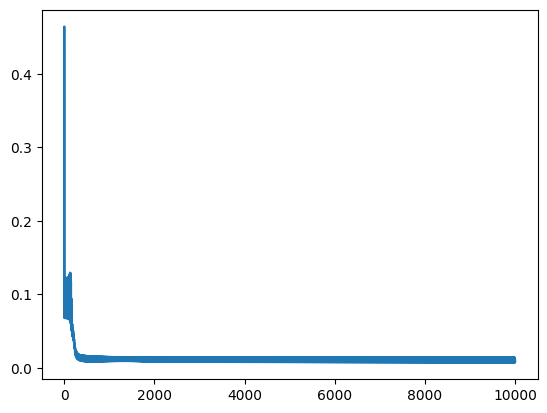

In [23]:
train_set_corpus = np.loadtxt("resource/asnlib/public/circle_train_data.csv", delimiter=",")
train_labels_corpus = np.loadtxt("resource/asnlib/public/circle_train_label.csv", delimiter=",")

test_set_corpus = np.loadtxt("resource/asnlib/public/circle_test_data.csv", delimiter=",")
# test_set_corpus = np.loadtxt("resource/asnlib/public/spiral_train_data.csv", delimiter=",")
test_labels_corpus = np.loadtxt("resource/asnlib/public/circle_test_label.csv", delimiter=",")

train_set_corpus = train_set_corpus.tolist()
train_labels_corpus = train_labels_corpus.tolist()

train_set = list(zip(train_set_corpus, train_labels_corpus))

batch_size = 128
layers = [128, 64]

learner = ANNAgent(layers, 2, 1, lrate=0.01)

train(learner, train_set)
preds = predict(learner, test_set_corpus)


count = 0
for i, el in enumerate(preds):
    if el[0] == int(test_labels_corpus[i]):
        count += 1
    # print(el[0], " ---- ", int(train_labels_corpus[i]))
print("acc: ", count/len(preds))

In [21]:
test_set_corpus = np.loadtxt("resource/asnlib/public/spiral_train_data.csv", delimiter=",")
test_labels_corpus = np.loadtxt("resource/asnlib/public/spiral_train_label.csv", delimiter=",")
preds = predict(learner, test_set_corpus)

In [22]:
count = 0
for i, el in enumerate(preds):
    if el[0] == int(test_labels_corpus[i]):
        count += 1
    # print(el[0], " ---- ", int(train_labels_corpus[i]))
print("acc: ", count/len(preds))

acc:  0.9905047476261869
